225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step    


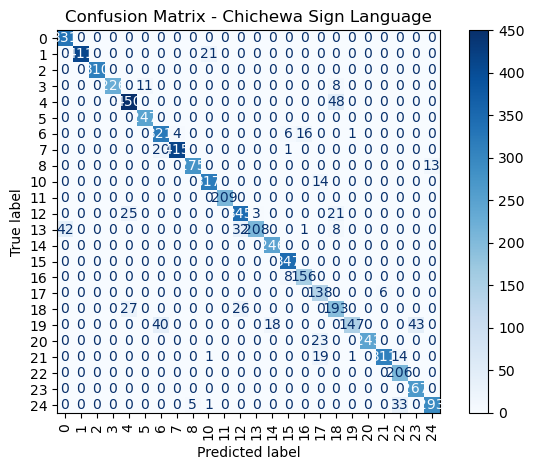

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# Step 2: Load the CSV test data
# -----------------------------
df = pd.read_csv('sign_mnist_test.csv')

# Extract pixel data and labels
X_test = df.drop('label', axis=1).values  # Change this if your label has another name
y_test = df['label'].values

# -------------------------------
# Step 3: Preprocess the data
# -------------------------------

# Reshape images to original size (e.g., 28x28 for Sign MNIST)
IMG_SIZE = 28
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # grayscale image

# Normalize pixel values from [0,255] to [0,1]
X_test = X_test.astype('float32') / 255.0

# -------------------------------
# Step 4: Load trained model
# -------------------------------
model = load_model('chichewa_sign_language.h5')

# -------------------------------
# Step 5: Make predictions
# -------------------------------
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# -------------------------------
# Step 6: Generate confusion matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)

# -------------------------------
# Step 7: Plot confusion matrix
# -------------------------------
class_names = sorted(np.unique(y_test))  # Get unique class names from labels

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix - Chichewa Sign Language")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Load the CSV
df = pd.read_csv('sign_mnist_test.csv')

# Show first few rows
print(df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12